In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
# import pandas_ta as ta
from finta import TA
# data = yf.download(tickers = 'BTC-USD', start = '2012-03-11',end = '2022-07-10')
# data.head(10)

In [18]:
import os 
print(os.getcwd())

/home/abdoo/Desktop/w9_scalable_backtesting/Scalable-Backtesting-Infrastructure/backtest


In [23]:
data = pd.read_csv("../data_folder/data3.csv")
data.head(10)

,Date,open,high,low,close,adj close,volume,SMA,RSI,EMA,Target,TargetClass,TargetNextClose
0,2014-10-28,353.214996,359.984009,352.678986,357.618011,357.618011,7845880,380.236953,41.629699,362.454692,-21.497986,0,335.591003
1,2014-10-29,357.088989,357.833008,335.342987,335.591003,335.591003,18192700,377.338310,34.155922,357.081589,9.595978,1,345.304993
2,2014-10-30,335.709015,350.912994,335.071991,345.304993,345.304993,30177900,375.454143,39.328954,354.726141,-6.687988,0,338.321014
3,2014-10-31,345.009003,348.045013,337.141998,338.321014,338.321014,12545400,374.109501,37.073754,351.444973,-12.901001,0,325.748993
4,2014-11-01,338.649994,340.528992,321.054993,325.748993,325.748993,16677200,372.129620,33.364827,346.305598,-0.183014,0,325.891998
5,2014-11-02,326.075012,329.049988,320.626007,325.891998,325.891998,8603620,370.393215,33.446388,342.222764,1.984985,1,327.553986
6,2014-11-03,325.569000,334.002014,325.480988,327.553986,327.553986,12948500,368.617071,34.450566,339.288943,3.330994,1,330.492004
7,2014-11-04,327.161011,331.766998,325.076996,330.492004,330.492004,15655500,366.109953,36.280859,337.529524,8.802979,1,339.485992
8,2014-11-05,330.683014,343.368988,330.683014,339.485992,339.485992,19817200,364.116643,41.651927,337.920823,9.832001,1,349.290009
9,2014-11-06,339.458008,352.966003,338.424011,349.290009,349.290009,18797000,362.633691,46.905741,340.194686,-7.402985,0,342.415009


In [3]:
# Adding some indicators 
data['SMA']=TA.SMA(data, 42)
data['RSI']=TA.RSI(data)
data['EMA']=TA.EMA(data)

data['Target'] = data['adj close']-data.open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['adj close'].shift(-1)

In [4]:
data

,Date,open,high,low,close,adj close,volume,SMA,RSI,EMA,Target,TargetClass,TargetNextClose
0,2014-10-28,353.214996,359.984009,352.678986,357.618011,357.618011,7845880,NaN,NaN,357.618011,-21.497986,0,335.591003
1,2014-10-29,357.088989,357.833008,335.342987,335.591003,335.591003,18192700,NaN,0.000000,345.380785,9.595978,1,345.304993
2,2014-10-30,335.709015,350.912994,335.071991,345.304993,345.304993,30177900,NaN,32.200031,345.349722,-6.687988,0,338.321014
3,2014-10-31,345.009003,348.045013,337.141998,338.321014,338.321014,12545400,NaN,25.774175,342.968724,-12.901001,0,325.748993
4,2014-11-01,338.649994,340.528992,321.054993,325.748993,325.748993,16677200,NaN,18.584461,337.846243,-0.183014,0,325.891998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2806,2022-07-04,19297.314453,20258.748047,19063.066406,20231.261719,20231.261719,21594638208,24962.924526,36.980508,20016.035770,-35.238281,0,20190.115234
2807,2022-07-05,20225.353516,20635.466797,19341.232422,20190.115234,20190.115234,26715546990,24737.556176,36.788160,20050.851663,353.626953,1,20548.246094
2808,2022-07-06,20194.619141,20595.529297,19823.511719,20548.246094,20548.246094,24598943708,24522.934384,39.726712,20150.330549,1089.773438,1,21637.587891
2809,2022-07-07,20547.814453,21771.816406,20296.103516,21637.587891,21637.587891,25814972520,24341.276367,47.692137,20447.782017,93.962891,1,21731.117188


In [5]:
data.dropna(inplace=True)
data

,Date,open,high,low,close,adj close,volume,SMA,RSI,EMA,Target,TargetClass,TargetNextClose
41,2014-12-08,374.964996,376.028992,361.885986,361.908997,361.908997,18898700,365.563000,44.365252,372.358554,-9.675995,0,352.218994
42,2014-12-09,361.894989,363.066986,344.950989,352.218994,352.218994,32915500,365.434452,39.703513,368.330368,-5.839996,0,346.364990
43,2014-12-10,352.204987,352.384003,346.364990,346.364990,346.364990,16427700,365.690975,37.162956,363.937053,6.166016,1,350.506012
44,2014-12-11,344.339996,361.356995,338.763000,350.506012,350.506012,32431300,365.814809,40.083641,361.250728,1.708984,1,352.541992
45,2014-12-12,350.833008,352.983002,349.290985,352.541992,352.541992,16989800,366.153404,41.522791,359.508920,-5.005005,0,347.376007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,2022-07-03,19242.095703,19558.269531,18966.951172,19297.076172,19297.076172,16390821947,25174.059012,29.173371,19962.229283,933.947266,1,20231.261719
2806,2022-07-04,19297.314453,20258.748047,19063.066406,20231.261719,20231.261719,21594638208,24962.924526,36.980508,20016.035770,-35.238281,0,20190.115234
2807,2022-07-05,20225.353516,20635.466797,19341.232422,20190.115234,20190.115234,26715546990,24737.556176,36.788160,20050.851663,353.626953,1,20548.246094
2808,2022-07-06,20194.619141,20595.529297,19823.511719,20548.246094,20548.246094,24598943708,24522.934384,39.726712,20150.330549,1089.773438,1,21637.587891


In [17]:
# data.to_csv("../data_folder/data3.csv")

In [6]:
data.isna().sum()

Date               0
open               0
high               0
low                0
close              0
adj close          0
volume             0
SMA                0
RSI                0
EMA                0
Target             0
TargetClass        0
TargetNextClose    0
dtype: int64

In [7]:
data_set = data.iloc[:, 0:13]#.values
pd.set_option('display.max_columns', None)

data_set.head(30)
# print(data_set.shape)
# print(data.shape)
# print(type(data_set))

,Date,open,high,low,close,adj close,volume,SMA,RSI,EMA,Target,TargetClass,TargetNextClose
41,2014-12-08,374.964996,376.028992,361.885986,361.908997,361.908997,18898700,365.563000,44.365252,372.358554,-9.675995,0,352.218994
42,2014-12-09,361.894989,363.066986,344.950989,352.218994,352.218994,32915500,365.434452,39.703513,368.330368,-5.839996,0,346.364990
43,2014-12-10,352.204987,352.384003,346.364990,346.364990,346.364990,16427700,365.690975,37.162956,363.937053,6.166016,1,350.506012
44,2014-12-11,344.339996,361.356995,338.763000,350.506012,350.506012,32431300,365.814809,40.083641,361.250728,1.708984,1,352.541992
45,2014-12-12,350.833008,352.983002,349.290985,352.541992,352.541992,16989800,366.153404,41.522791,359.508920,-5.005005,0,347.376007
46,2014-12-13,352.381012,352.381012,346.588013,347.376007,347.376007,11675900,366.668333,38.965361,357.082270,4.904999,1,351.631989
47,2014-12-14,346.726990,353.316010,345.417999,351.631989,351.631989,12415200,367.281190,42.127775,355.992189,-6.015991,0,345.345001
48,2014-12-15,351.360992,351.815002,344.933990,345.345001,345.345001,17264200,367.704785,38.919735,353.862714,-18.610992,0,327.062012
49,2014-12-16,345.673004,345.859009,327.062012,327.062012,327.062012,30864900,367.623119,31.425285,348.502497,-7.079010,0,319.776001
50,2014-12-17,326.855011,333.954010,315.152008,319.776001,319.776001,37567900,367.153833,29.026497,342.757132,-8.389008,0,311.395996


In [8]:
# data_set.reset_index(inplace = True)
data_set.drop(['volume', 'close', 'Date'], axis=1, inplace=True)
data_set


,open,high,low,adj close,SMA,RSI,EMA,Target,TargetClass,TargetNextClose
41,374.964996,376.028992,361.885986,361.908997,365.563000,44.365252,372.358554,-9.675995,0,352.218994
42,361.894989,363.066986,344.950989,352.218994,365.434452,39.703513,368.330368,-5.839996,0,346.364990
43,352.204987,352.384003,346.364990,346.364990,365.690975,37.162956,363.937053,6.166016,1,350.506012
44,344.339996,361.356995,338.763000,350.506012,365.814809,40.083641,361.250728,1.708984,1,352.541992
45,350.833008,352.983002,349.290985,352.541992,366.153404,41.522791,359.508920,-5.005005,0,347.376007
...,...,...,...,...,...,...,...,...,...,...
2805,19242.095703,19558.269531,18966.951172,19297.076172,25174.059012,29.173371,19962.229283,933.947266,1,20231.261719
2806,19297.314453,20258.748047,19063.066406,20231.261719,24962.924526,36.980508,20016.035770,-35.238281,0,20190.115234
2807,20225.353516,20635.466797,19341.232422,20190.115234,24737.556176,36.788160,20050.851663,353.626953,1,20548.246094
2808,20194.619141,20595.529297,19823.511719,20548.246094,24522.934384,39.726712,20150.330549,1089.773438,1,21637.587891


In [4]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.00293988 0.00239579 0.00287531 ... 0.50790013 0.         0.00258376]
 [0.00274588 0.00220678 0.00261954 ... 0.50815804 0.         0.00249689]
 [0.00260206 0.002051   0.00264089 ... 0.50896524 1.         0.00255834]
 ...
 [0.29757477 0.29781807 0.28952669 ... 0.53232611 1.         0.30227821]
 [0.29711859 0.2972357  0.29681072 ... 0.58181949 1.         0.31844325]
 [0.30236098 0.31438827 0.30394843 ... 0.51486809 1.         0.31983116]]


In [10]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(7):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2769
[[[0.00293988 0.00239579 0.00287531 ... 0.0022167  0.40820344 0.00235942]
  [0.00274588 0.00220678 0.00261954 ... 0.00221461 0.35295777 0.00229678]
  [0.00260206 0.002051   0.00264089 ... 0.00221879 0.32284996 0.00222845]
  ...
  [0.00154734 0.00110092 0.00130043 ... 0.00183694 0.17977636 0.00125217]
  [0.00130894 0.0009713  0.00141328 ... 0.00179722 0.25134808 0.00116916]
  [0.00145035 0.00110563 0.00152825 ... 0.00176265 0.32483888 0.0011392 ]]

 [[0.00274588 0.00220678 0.00261954 ... 0.00221461 0.35295777 0.00229678]
  [0.00260206 0.002051   0.00264089 ... 0.00221879 0.32284996 0.00222845]
  [0.00248532 0.00218184 0.00252608 ... 0.00222081 0.35746261 0.00218668]
  ...
  [0.00130894 0.0009713  0.00141328 ... 0.00179722 0.25134808 0.00116916]
  [0.00145035 0.00110563 0.00152825 ... 0.00176265 0.32483888 0.0011392 ]
  [0.00162053 0.00126897 0.00168506 ... 0.00173395 0.37176373 0.00114057]]

 [[0.00260206 0.002051   0.00264089 ... 0.00221879 0.32284996 0.00222845]
  [0.00248532 0.0

In [11]:
print(X.shape)
print(y.shape)

(2739, 30, 7)
(2739, 1)


In [12]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2191
(2191, 30, 7)
(548, 30, 7)
(2191, 1)
(548, 1)
[[0.00156177]
 [0.00166652]
 [0.00143485]
 ...
 [0.47179719]
 [0.50178018]
 [0.54380403]]


In [13]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 7), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

2024-06-25 23:00:47.199283: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-25 23:00:47.200904: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-25 23:00:47.213825: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-25 23:00:47.361163: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-25 23:00:49.668193: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

Epoch 1/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0011 - val_loss: 2.8400e-04
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 7.3076e-05 - val_loss: 4.9189e-04
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 6.5976e-05 - val_loss: 2.3620e-04
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 5.1128e-05 - val_loss: 3.3908e-04
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 7.3075e-05 - val_loss: 3.5806e-04
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 6.4675e-05 - val_loss: 2.5945e-04
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 5.8748e-05 - val_loss: 2.5691e-04
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 6.4958e-05 - val_loss: 2.6215e-04
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 4.6724e-05 - val_loss: 3.2473e-04
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 5.9870e-05 - val_loss: 3.4258e-04
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/ste

In [14]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
[0.4528123] [0.58159492]
[0.4887607] [0.60276413]
[0.523027] [0.59470548]
[0.53889275] [0.56653896]
[0.5398183] [0.52514057]
[0.50881183] [0.50074931]
[0.46143326] [0.5511049]
[0.45454282] [0.57886872]
[0.48357636] [0.54381893]
[0.5141359] [0.53421455]


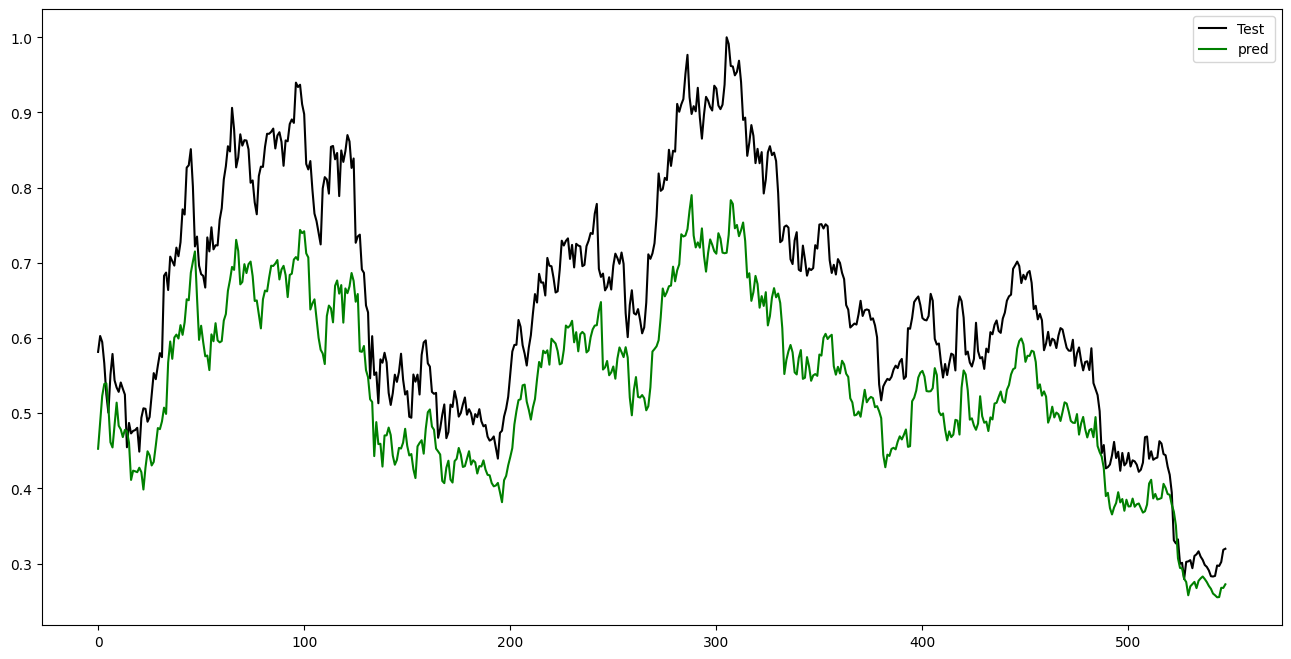

In [15]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()